In [1]:
from lqfn.plain_qm import SchrodingerSystem
from lqfn.plotting import plot_delta_E

Calculation of the propagator for a one dimensional anharmonic oscillator, meaning that the potential is
$$
    V(x) = \frac{x^4}{4}
$$

In [2]:
T = 10
N = 20

In [3]:
eps=1.4
N_copies = 10

In [4]:
a = T/N

In [5]:
def compute_G(x,n):
    N = x.shape[0]
    g = 0
    for j in range(0,N):        
        g = g + x[j]*x[(j+n)%N]
    return g/N

In [6]:
def V(x):
    return x**4/4

In [7]:
def S_per_timeslice_quartic(j,x,a): # harm. osc. S
    N = x.shape[0]
    jp = (j+1)%N # next site
    jm = (j-1+N)%N # previous site
    return a*V(x[j]) + x[j]*(x[j]-x[jp]-x[jm])/a

In [8]:
anharm_osc = SchrodingerSystem(T=T, N=N, V=V, S_per_timeslice=S_per_timeslice_quartic)

In [9]:
delta_E_exact = anharm_osc.get_delta_E_schrodinger()
print(f'$\\Delta E$ of quartic oscillator: {delta_E_exact}')

Computing...
Took 0.6668779850006104
$\Delta E$ of quartic oscillator: 0.5435549206545833


In [13]:
avg_delta_E, std_delta_E = anharm_osc.compute_delta_E_pimc(functional=compute_G,
                                                           N_cf=5000,
                                                           N_cor=20,
                                                           eps=eps,
                                                           N_copies=N_copies)

c:\Users\damia\Projects\path-integral-monte-carlo\src\lqfn\plotting.py:58: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


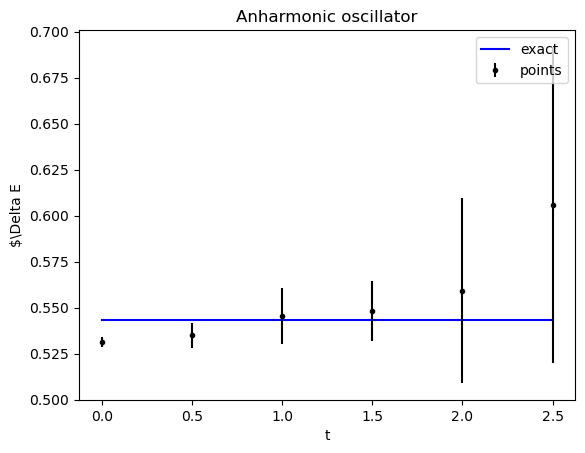

In [12]:
fig = plot_delta_E(avg_delta_E, std_delta_E,
                   exact=delta_E_exact,
                   a=a,
                   title="Anharmonic oscillator",
                   n=6)
fig.show()